![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Sentiment Classification

### Dataset
- Dataset of 50,000 movie reviews from IMDB, labeled by sentiment positive (1) or negative (0)
- Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).
- For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".
- As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

Command to import data
- `from tensorflow.keras.datasets import imdb`

### Import the data (4 Marks)
- Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np
import pandas as pd
(X_train, y_train), (X_test, y_test) =imdb.load_data()
X= np.concatenate((X_train,X_test),axis=0)
y= np.concatenate((y_train,y_test),axis=0)
print("unique y")
print(np.unique(y))
print("unique X")
print(len(np.unique(np.hstack(X))))

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

unique y
[0 1]
unique X
88585


In [ ]:
max_features = 10000
maxlen = 300  # cut texts after this number of words (among top max_features most common words)
batch_size = 512

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### Pad each sentence to be of same length (4 Marks)
- Take maximum sequence length as 300

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Pad sequences (samples x time)
x_train shape: (25000, 300)
x_test shape: (25000, 300)


### Print shape of features & labels (4 Marks)

Number of review, number of words in each review

Number of labels

In [ ]:
print('x_train shape:', x_train.shape)

x_train shape: (25000, 300)


In [ ]:
print('x_train shape:', y_train.shape)

x_train shape: (25000,)


### Print value of any one feature and it's label (4 Marks)

Feature value

In [ ]:
print('x_train feature:', x_train[10])

x_train feature: [   6  346  137   11    4 2768  295   36 7740  725    6 3208  273   11
    4 1513   15 1367   35  154    2  103    2  173    7   12   36  515
 3547   94 2547 1722    5 3547   36  203   30  502    8  361   12    8
  989  143    4 1172 3404   10   10  328 1236    9    6   55  221 2989
    5  146  165  179  770   15   50  713   53  108  448   23   12   17
  225   38   76 4397   18  183    8   81   19   12   45 1257    8  135
   15    2  166    4  118    7   45    2   17  466   45    2    4   22
  115  165  764 6075    5 1030    8 2973   73  469  167 2127    2 1568
    6   87  841   18    4   22    4  192   15   91    7   12  304  273
 1004    4 1375 1172 2768    2   15    4   22  764   55 5773    5   14
 4233 7444    4 1375  326    7    4 4760 1786    8  361 1236    8  989
   46    7    4 2768   45   55  776    8   79  496   98   45  400  301
   15    4 1859    9    4  155   15   66    2   84    5   14   22 1534
   15   17    4  167    2   15   75   70  115   66   30  252

Label value

In [ ]:
print('x_train shape:', y_train[10])

x_train shape: 1


### Decode the feature value to get original sentence (4 Marks)

First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

In [ ]:
#### Add your code here ####
from string import punctuation
#print(punctuation)
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])    

1646592/1641221 [==============================] - 0s 0us/step


Now use the dictionary to get the original words from the encodings, for a particular sentence

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[0]])
decoded_review

"? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the s

Get the sentiment for the above sentence
- positive (1)
- negative (0)

In [ ]:
    if(y_train[10] == 1):
        print('positive (', y_train[10],')')
    else:
        print('negative', y_train[10],')')
        


positive ( 1 )


### Define model (10 Marks)
- Define a Sequential Model
- Add Embedding layer
  - Embedding layer turns positive integers into dense vectors of fixed size
  - `tensorflow.keras` embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unique integer number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn LabelEncoder.
  - Size of the vocabulary will be 10000
  - Give dimension of the dense embedding as 100
  - Length of input sequences should be 300
- Add LSTM layer
  - Pass value in `return_sequences` as True
- Add a `TimeDistributed` layer with 100 Dense neurons
- Add Flatten layer
- Add Dense layer

In [ ]:
x_train = np.asarray(x_train).astype('float32')
x_test = np.asarray(x_test).astype('float32')
#print(x_train[0])
#print(x_test[0])
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
print(y_train)
print(y_test)

[1. 0. 0. ... 0. 1. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import LSTM,Flatten, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input,SpatialDropout1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM,Flatten, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input
print('Build model...')
model = Sequential()
#model.add(Embedding(max_features, 128))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
#model.add(Dense(1, activation='sigmoid'))
embedding_vector_features=100
voc_size=max_features
model.add(Embedding(voc_size, embedding_vector_features,input_length=maxlen))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(input_dimension, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(TimeDistributed(Dense(input_dimension,activation='relu')))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

Build model...


### Compile the model (4 Marks)
- Use Optimizer as Adam
- Use Binary Crossentropy as loss
- Use Accuracy as metrics

In [ ]:
# try using different optimizers and different optimizer configs
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Print model summary (4 Marks)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 300, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 300, 100)          80400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 300, 100)          10100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 30001     
Total params: 1,120,501
Trainable params: 1,120,501
Non-trainable params: 0
____________________________________________

### Fit the model (4 Marks)

Model fitting with batch_size as 32

In [ ]:
print('Train...')
history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=3,
          validation_data=(x_test, y_test))

Train...
Epoch 1/3
782/782 [==============================] - 887s 1s/step - loss: 0.4878 - accuracy: 0.7541 - val_loss: 0.2657 - val_accuracy: 0.8907
Epoch 2/3
782/782 [==============================] - 885s 1s/step - loss: 0.1961 - accuracy: 0.9246 - val_loss: 0.2749 - val_accuracy: 0.8899
Epoch 3/3
782/782 [==============================] - 883s 1s/step - loss: 0.1529 - accuracy: 0.9418 - val_loss: 0.3267 - val_accuracy: 0.8806


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

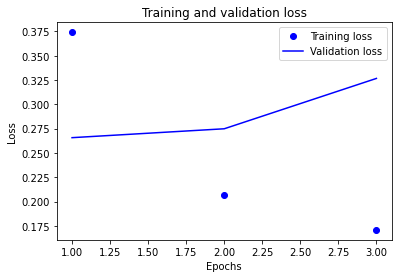

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


Model fitting with batch_size as 64

In [ ]:
print('Train...')
history_64 = model.fit(x_train, y_train,
          batch_size=64,
          epochs=3,
          validation_data=(x_test, y_test))

Train...
Epoch 1/3
391/391 [==============================] - 441s 1s/step - loss: 0.1191 - accuracy: 0.9551 - val_loss: 0.3461 - val_accuracy: 0.8840
Epoch 2/3
391/391 [==============================] - 441s 1s/step - loss: 0.0889 - accuracy: 0.9673 - val_loss: 0.4087 - val_accuracy: 0.8831
Epoch 3/3
391/391 [==============================] - 441s 1s/step - loss: 0.0794 - accuracy: 0.9704 - val_loss: 0.4508 - val_accuracy: 0.8787


In [ ]:
history_dict_64 = history_64.history
history_dict_64.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

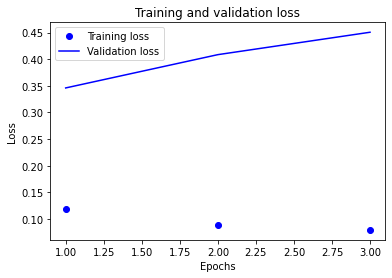

In [ ]:
import matplotlib.pyplot as plt

acc = history_64.history['accuracy']
val_acc = history_64.history['val_accuracy']
loss = history_64.history['loss']
val_loss = history_64.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [ ]:
#best batch_size =64
batch_size=64


### Evaluate model (4 Marks)

In [ ]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test loss:', score)
print('Test accuracy:', acc)

391/391 [==============================] - 29s 74ms/step - loss: 0.4508 - accuracy: 0.8787
Test loss: 0.4507735073566437
Test accuracy: 0.8787199854850769


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.87872
              precision    recall  f1-score   support

         pos       0.88      0.88      0.88     12500
         neg       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000

[[10986  1514]
 [ 1518 10982]]


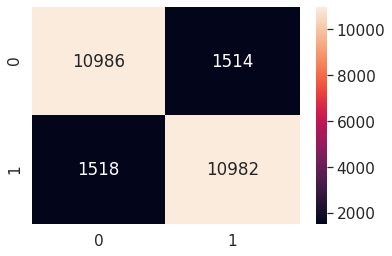

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sn
y_pred = model.predict_classes(np.array(x_test))
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
target_names = ['pos', 'neg']
cnf_matrix_test = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=target_names))
print(cnf_matrix_test)
df_cm = pd.DataFrame(cnf_matrix_test, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d')

### Predict on one sample (4 Marks)

In [ ]:
decoded_review_test = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_test[10]])
print(decoded_review_test)

if (y_pred[10] == 1):
  print("Predicted Positive",y_pred[10])
elif (y_pred[10] == 0):
  print("Predicted negative",y_pred[10])
if (y_test[10] == 1):
  print("Original Positive",y_test[10])
elif (y_test[10] == 0):
  print("Original negative",y_test[10])


? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? inspired by hitchcock's strangers on a train concept of two men ? murders in exchange for getting rid of the two people messing up their lives throw ? from the train is an original and very inventive comedy take on the idea it's a credit to danny ? that he both wrote and starred in this minor comedy gem br br anne ? is the mother who ? the film's title and it's understandable why she gets under the skin of danny ? with her sharp tongue and relentlessly putting him down for any minor ? billy crystal is the writer who's wife has stolen his book idea and is now being ? as a great new author even appearing on the oprah show to in ? he should be enjoying thus ? gets the idea of ? murders to rid themselves of these ? factors br br of course everything and anything can happen when writer carl ? lets his imaginat

**External text Predictions sample**




In [ ]:
# predict sentiment from reviews
bad = "this movie was terrible and bad"
for review in [bad]:
    tmp = []
    for word in review.split(" "):
        if(word.isalpha()):
            tmp.append(word_index[word])
    tmp_padded = pad_sequences([tmp], maxlen=300)
    sentiment = model.predict(np.array([tmp_padded[0]]))
    print("%s. Sentiment: %s" % (review, model.predict(np.array([tmp_padded[0]]))))
    if(np.argmax(sentiment) == 0):
        print("negative")
    elif (np.argmax(sentiment) == 1):
        print("positive")

this movie was terrible and bad. Sentiment: [[0.4976253]]
negative


# Conclusion:
# The process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer’s attitude towards a particular topic, product, etc. is positive, negative, or neutral. In common ML words its just a classification problem.
# Predicted the positive and negative based on the prediction by performing Pad_sequence on data and applied Layers like Embeding, LSTM, TimeDistriubted with dense layer. Achieved desired results.